# 오차역전파법

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-단순한-계층-구현하기" data-toc-modified-id="1.-단순한-계층-구현하기-1">1. 단순한 계층 구현하기</a></span><ul class="toc-item"><li><span><a href="#1.1-곱셈-계층" data-toc-modified-id="1.1-곱셈-계층-1.1">1.1 곱셈 계층</a></span></li><li><span><a href="#1.2-덧셈-계층" data-toc-modified-id="1.2-덧셈-계층-1.2">1.2 덧셈 계층</a></span></li></ul></li><li><span><a href="#2.-활성화-함수-계층-구현하기" data-toc-modified-id="2.-활성화-함수-계층-구현하기-2">2. 활성화 함수 계층 구현하기</a></span><ul class="toc-item"><li><span><a href="#2.1-ReLU-계층" data-toc-modified-id="2.1-ReLU-계층-2.1">2.1 ReLU 계층</a></span></li><li><span><a href="#2.2-Sigmoid-계층" data-toc-modified-id="2.2-Sigmoid-계층-2.2">2.2 Sigmoid 계층</a></span></li><li><span><a href="#2.3-Softmax-with-Loss-계층" data-toc-modified-id="2.3-Softmax-with-Loss-계층-2.3">2.3 Softmax-with-Loss 계층</a></span></li></ul></li><li><span><a href="#3.-오차역전파법을-적용한-신경망-구현하기" data-toc-modified-id="3.-오차역전파법을-적용한-신경망-구현하기-3">3. 오차역전파법을 적용한 신경망 구현하기</a></span><ul class="toc-item"><li><span><a href="#3.1-구현" data-toc-modified-id="3.1-구현-3.1">3.1 구현</a></span></li><li><span><a href="#3.2-오차역전파법으로-구한-기울기-검증하기-(ft.-수치미분)" data-toc-modified-id="3.2-오차역전파법으로-구한-기울기-검증하기-(ft.-수치미분)-3.2">3.2 오차역전파법으로 구한 기울기 검증하기 (ft. 수치미분)</a></span></li><li><span><a href="#3.3-오차역전파법을-사용한-학습-구현하기" data-toc-modified-id="3.3-오차역전파법을-사용한-학습-구현하기-3.3">3.3 오차역전파법을 사용한 학습 구현하기</a></span></li></ul></li></ul></div>

## 1. 단순한 계층 구현하기
* 책 내에 사과 쇼핑 예를 구현해보자.

### 1.1 곱셈 계층

In [4]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

In [5]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [6]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


### 1.2 덧셈 계층

In [7]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [14]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)
print('순전파:',price)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

순전파: 715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


## 2. 활성화 함수 계층 구현하기

### 2.1 ReLU 계층

In [ ]:
class ReLU:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <=0)
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

In [1]:
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
mask = (x<=0)
mask

array([[False,  True],
       [ True, False]])

### 2.2 Sigmoid 계층

In [2]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1+np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0-self.out) * self.out
        return dx

### 2.3 Softmax-with-Loss 계층

In [3]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y-self.t) / batch_size
        return dx

## 3. 오차역전파법을 적용한 신경망 구현하기

### 3.1 구현

In [11]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


### 3.2 오차역전파법으로 구한 기울기 검증하기 (ft. 수치미분)

In [ ]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

In [16]:
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ':' + str(diff))

W1:1.6744005097450327e-10
b1:7.71848753106639e-10
W2:6.92306910444751e-08
b2:1.381679298292915e-07


### 3.3 오차역전파법을 사용한 학습 구현하기

In [17]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7753833333333333, 0.7831
train acc, test acc | 0.8754333333333333, 0.8793
train acc, test acc | 0.8979333333333334, 0.9003
train acc, test acc | 0.9071, 0.9081
train acc, test acc | 0.9127166666666666, 0.9145
train acc, test acc | 0.9174, 0.9192
train acc, test acc | 0.9214166666666667, 0.9242
train acc, test acc | 0.9239, 0.9253
train acc, test acc | 0.9276, 0.9275
train acc, test acc | 0.93095, 0.9307
train acc, test acc | 0.93395, 0.9315
train acc, test acc | 0.93705, 0.9349
train acc, test acc | 0.9394, 0.9373
train acc, test acc | 0.9411, 0.9393
train acc, test acc | 0.94275, 0.9415
train acc, test acc | 0.94415, 0.9432


<Figure size 640x480 with 1 Axes>

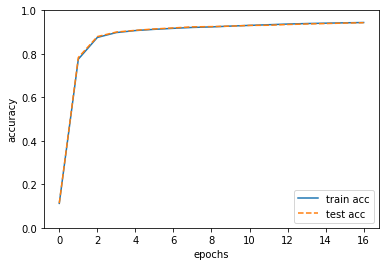

In [19]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()